<a href="https://colab.research.google.com/github/MariaNatiele/AprendizadoMaquina_Projetos/blob/main/2_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado Supervisionado - Previsão de ataque cardíaco -  Naive Bayes




In [ ]:
#[1] Base de Dados
from google.colab import files
dados = files.upload()

Saving previsaodeataquecardiaco.csv to previsaodeataquecardiaco.csv


In [ ]:
#[2] Mostra os Dados
import pandas as pd
dados = pd.read_csv('previsaodeataquecardiaco.csv')

In [ ]:
dados.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#[3] Separação das variaveis

y = dados['output']
#x = dados[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
x = dados.drop('output', axis=1)


In [ ]:
#[4] Separando os Dados de teste e treino
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3)

In [ ]:
y_treino.shape

(212,)

In [ ]:
#Naive Bayes - GaussianNB
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB();
#Calibrando o modelo com os dados de treino:
naivebayes.fit(x_treino, y_treino)

GaussianNB()

In [ ]:
resultado = naivebayes.predict(x_teste)


In [ ]:
#[6.0] Metricas - Acurácia

from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, resultado)*100
print("Acurácia ",acuracia)

Acurácia  85.71428571428571


In [ ]:
#[6.1] Metricas - Precisão
from sklearn.metrics import precision_score

precisao = precision_score(y_teste,resultado)
print("Precisão ",precisao)

Precisão  0.8727272727272727


In [ ]:
#[6.2] Metricas - Recall
from sklearn.metrics import recall_score
recall = recall_score(y_teste, resultado)
print("Recall ",recall)


Recall  0.8888888888888888


In [ ]:
#[6.3] Todas as métricas
from sklearn.metrics import classification_report
print(classification_report(y_teste, resultado))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.87      0.89      0.88        54

    accuracy                           0.86        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#correlação
correlacao =dados.drop('output', axis=1)

In [ ]:
correlacao.corr()

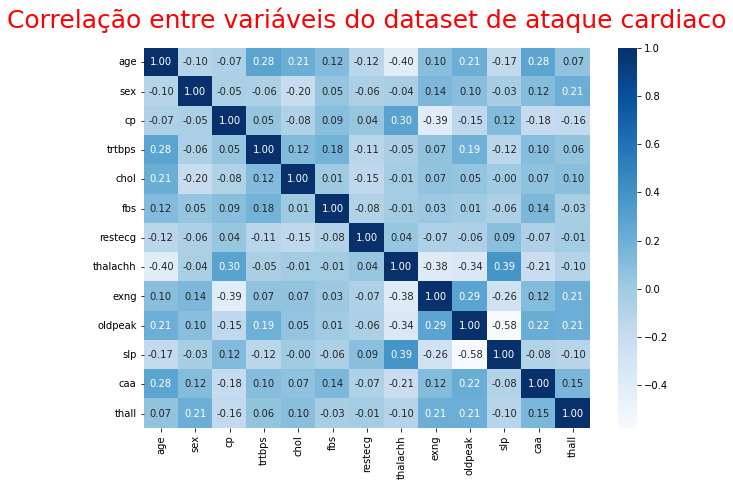

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(correlacao.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de ataque cardiaco', fontsize = 25, pad= 20, color = 'red')

plt.show()


In [ ]:
dados[dados.columns].describe()

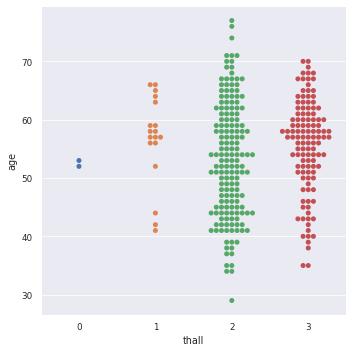

In [ ]:
#idade e colesterol
sns.catplot(x='thall', y='age',kind= 'swarm', data=dados)
sns.set_theme(context='notebook');


In [ ]:
y_pred = naivebayes.predict(x_teste)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, y_pred)
print('Confusion Matrix')
print(cm)

Confusion Matrix
[[30  7]
 [ 6 48]]


In [ ]:
# Metricas - Acurácia
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, y_pred)*100

In [ ]:
acuracia

85.71428571428571